# Lab: Cost Function for Logistic Regression

In this segment, we shall examine the cost function of logistic regression and its implementation.

Import the required libraries:

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, dlc
plt.style.use('./deeplearning.mplstyle')

## Dataset
We can use the dataset we implemented in the decision boundary lab.

In [2]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

Next, we can implement a helper function to plot and visualize the data. The data points with the label y = 1 are represented by the red crosses, while the data points with the label y = 0 are represented by the blue circles.

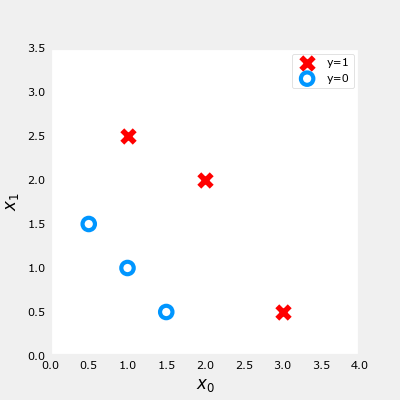

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0 to 4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost Function

Recall that loss is applied to one training example. In this case, we combine the losses for the various training examples to form the cost.

For logistic regression, the cost function is of the form:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is given by:
         $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

* where m is the number of training examples in the data set.
* The model prediction is given by:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

### Code Description

The algorithm for `compute_cost_logistic` loops over all the training examples, computing the loss for each example then accumulating the total.

Note that the variables x and y are not scalar values, but they are matrices of the shape ($m, n$) and ($m$,) respectively, where $n$ is the number of features, and $m$ is the number of training examples.

In the code, we also implement the log() numpy function to calculate the logarithm of the model prediction.

In [5]:
def compute_cost_logistic(X, y, w, b):
    """
    Description: Computes cost

    Arguments:
        X (ndarray (m,n)): Data, m training examples with n features
        y (ndarray (m,)) : target values
        w (ndarray (n,)) : model parameters
        b (scalar)       : model parameter
    
    Returns:
        cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0 # initialize the cost
    for i in range(m):
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1-y[i]) * np.log(1-f_wb_i)
    
    cost = cost / m # computes the total cost of all the training examples
    return cost


Next, we implement the function

In [6]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

[0.37]


Now we can compute the cost function for a different value of w.
We can evaluate whether $b = -4, w_0 = 1, w_1=1$ will provide a better model.

First, we can plot a decision boundary for these two different $b$ values to see which one fits the data better

* For $b = -3, w_0 = 1, w_1 = 1$, we will plot $-3 + x_0 + x_1 = 0$ (represented in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we will plot $-4 + x_0 + x_1 = 0$ (represented in magenta)

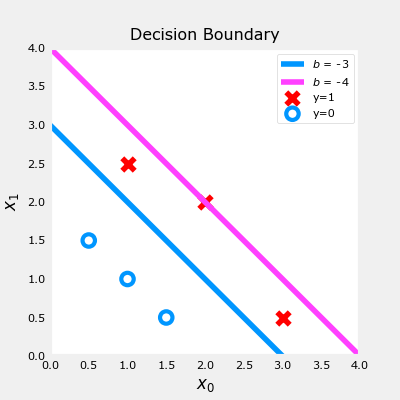

In [8]:
# Choose a range of values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_1 = 4 - x0

# Implement a suitable size for the plot
fig, ax = plt.subplots(1, 1, figsize=(4,4))

# Plot the decision boundary
ax.plot(x0, x1, c=dlc["dlblue"], label="$b$ = -3")
ax.plot(x0, x1_1, c=dlc["dlmagenta"], label = "$b$ = -4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize = 12)
ax.set_xlabel('$x_0$', fontsize = 12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

From the plot, setting $b = -4$ produces a poor model for the training data. To confirm this, we can implement the cost function.

In [9]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  [0.37]
Cost for b = -4 :  [0.5]


From the results, the cost function for $b = -4$ with the same values of w is higher than the cost function for $b = -3$

This implies that the choice of parameter b affects the position of the decision boundary, the cost function for Logistic Regression, and ultimately the nature of the model.